# Preliminary Data Analysis
To determine the demand & renewable generation curve

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Set working directory as current directory
working_path = "C:/Users/Simo/Documents/GitHub/Fission-Reactor-Physics"

# Load the CSV
path = working_path + "/Integration of Nuclear and Renewables/Project_Data/Ext_Data/FILTERED_db.csv"
df = pd.read_csv(path, dtype=str)

## Preparatory Work
Start by trying to scale teh data form my small dataset to be representative of the total share of buildings.  
Do this by heated area

In [2]:
# Convert heated area to float and filter outliers
heated_area = df['SUPERF_UTILE_RISCALDATA'].astype(float)
limit = 600 # Do not consider buildings with heated area greater than 600 m2
print(f"Number of Ouliars excluded {len(heated_area[heated_area >= limit])}")
print(f"Number of buildings considered {len(heated_area[heated_area < limit])}")
print(f"Total number of records: {len(heated_area)}")
heated_area = heated_area[heated_area < limit]

Number of Ouliars excluded 99
Number of buildings considered 68868
Total number of records: 68967


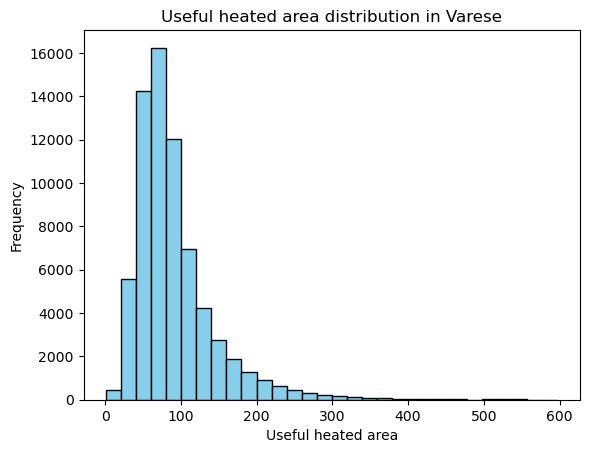

In [3]:
# Create histogram to show the distribution of useful heated area
bin_counts, bin_edges = np.histogram(heated_area, bins=30)

# Plot histogram
plt.hist(heated_area, bins=30, color='skyblue', edgecolor='black')
plt.xlabel("Useful heated area")
plt.ylabel("Frequency")
plt.title("Useful heated area distribution in Varese")
plt.show()

In [4]:
# Average heated area
average = heated_area.mean()
print(f"Average useful heated area in Varese: {average:.2f} m²")
total_area = heated_area.sum()
print(f"Total useful heated area in Varese: {total_area:.2f} m²")
print(f"Number of records: {len(heated_area)}")

Average useful heated area in Varese: 91.37 m²
Total useful heated area in Varese: 6292183.70 m²
Number of records: 68868


Here we show the scaling factors that are used, we might have to touch them to make them more rapresentative of the reality

In [5]:
# Reference heated areas from the TERMOLOG simulations
refs = {
    'A4': 687,
    'A3': 210,
    'A2': 164,
    'A1': 164,
    'B': 306,
    'C': 254,
    'D': 347,
    'E': 306,
    'F': 155,
    'G': 311
}

# Correction factor: average area / each reference area
scaling_corr = {label: round(average / area, 2) for label, area in refs.items()}

# Display correction factors
print("\nScaling correction factors to match average heated area:")
for label in refs:
    print(f"{label}: Sup Disp = {refs[label]} m², CorrF = {scaling_corr[label]}")


Scaling correction factors to match average heated area:
A4: Sup Disp = 687 m², CorrF = 0.13
A3: Sup Disp = 210 m², CorrF = 0.44
A2: Sup Disp = 164 m², CorrF = 0.56
A1: Sup Disp = 164 m², CorrF = 0.56
B: Sup Disp = 306 m², CorrF = 0.3
C: Sup Disp = 254 m², CorrF = 0.36
D: Sup Disp = 347 m², CorrF = 0.26
E: Sup Disp = 306 m², CorrF = 0.3
F: Sup Disp = 155 m², CorrF = 0.59
G: Sup Disp = 311 m², CorrF = 0.29


### More data import

In [6]:
# Headers:
# CLASSE_ENERGETICA,EP_GL_NREN,Y,Z,EP_GL_REN,EMISSIONI_CO2,CONSUMI_ENERGIA_ELETTRICA,
# CONSUMI_GAS_NATURALE,CONSUMI_GPL,CONSUMI_CARBONE,CONSUMI_GASOLIO,
# CONSUMI_BIOMASSE_SOLIDE,CONSUMI_BIOMASSE_LIQUIDE,CONSUMI_BIOMASSE_GASSOSE,
# CONSUMI_SOLARE_FOTOVOLTAICO,CONSUMI_SOLARE_TERMICO,CONSUMI_EOLICO,
# CONSUMI_TELERISCALDAMENTO,CONSUMI_TELERAFFRESCAMENTO
# Divide by CLASSE_ENERGETICA
ep_gl_nren = df['EP_GL_NREN'].astype(float)
ep_gl_ren = df['EP_GL_REN'].astype(float)
electric = df['CONSUMI_ENERGIA_ELETTRICA'].astype(float)
gas = df['CONSUMI_GAS_NATURALE'].astype(float)
gpl = df['CONSUMI_GPL'].astype(float)
carbone = df['CONSUMI_CARBONE'].astype(float)
gasolio = df['CONSUMI_GASOLIO'].astype(float)
biomass = df['CONSUMI_BIOMASSE_SOLIDE'].astype(float) + df['CONSUMI_BIOMASSE_LIQUIDE'].astype(float) + df['CONSUMI_BIOMASSE_GASSOSE'].astype(float)

solare_fotovoltaico = df['CONSUMI_SOLARE_FOTOVOLTAICO'].astype(float)
solare_termico = df['CONSUMI_SOLARE_TERMICO'].astype(float)
eolico = df['CONSUMI_EOLICO'].astype(float)
teleriscaldamento = df['CONSUMI_TELERISCALDAMENTO'].astype(float)
teleraffrescamento = df['CONSUMI_TELERAFFRESCAMENTO'].astype(float)

# Sum and print results
print("\nTotal Annual energy consumption by source:")
print(f"Electricity: {electric.sum():.2f} kWh")
print(f"Natural Gas: {gas.sum():.2f} m³")
print(f"GPL: {gpl.sum():.2f} m³")
print(f"Coal: {carbone.sum():.2f} m³")
print(f"Diesel: {gasolio.sum():.2f} m³")
print(f"Biomass: {biomass.sum():.2f} m³")
print(f"Solar PV: {solare_fotovoltaico.sum():.2f} kWh")
print(f"Solar Thermal: {solare_termico.sum():.2f} kWh")
print(f"Wind: {eolico.sum():.2f} kWh")
print(f"District Heating: {teleriscaldamento.sum():.2f} kWh")
print(f"District Cooling: {teleraffrescamento.sum():.2f} kWh")

# Inidici di prestazione
print(f"EP GL NREN: {ep_gl_nren.sum():.2f} kWh/m²annum")
print(f"EP GL REN: {ep_gl_ren.sum():.2f} kWh/m²annum")


Total Annual energy consumption by source:
Electricity: 45391872.48 kWh
Natural Gas: 1039900848.93 m³
GPL: 1575706.00 m³
Coal: 0.00 m³
Diesel: 3630960.16 m³
Biomass: 10733968.00 m³
Solar PV: 15791020.00 kWh
Solar Thermal: 3671141.00 kWh
Wind: 0.00 kWh
District Heating: 6266882.00 kWh
District Cooling: 0.00 kWh
EP GL NREN: 17316775.22 kWh/m²annum
EP GL REN: 1283997.63 kWh/m²annum


## Evaluation of the Heating and Cooling systems
First the share of households with cooling systems

In [7]:
# Share of buildings with cooling
sup_raffrescata = df['SUPERF_UTILE_RAFFRESCATA'].astype(float)
# Count how many buildings have cooling
cooling_count = len(sup_raffrescata[sup_raffrescata > 0])
# Percentage of buildings with cooling
cooling_percentage = (cooling_count / len(df)) * 100
print(f"Percentage of buildings with cooling: {cooling_percentage:.2f}%")

Percentage of buildings with cooling: 9.58%


Then identify those that have an heat pump installed

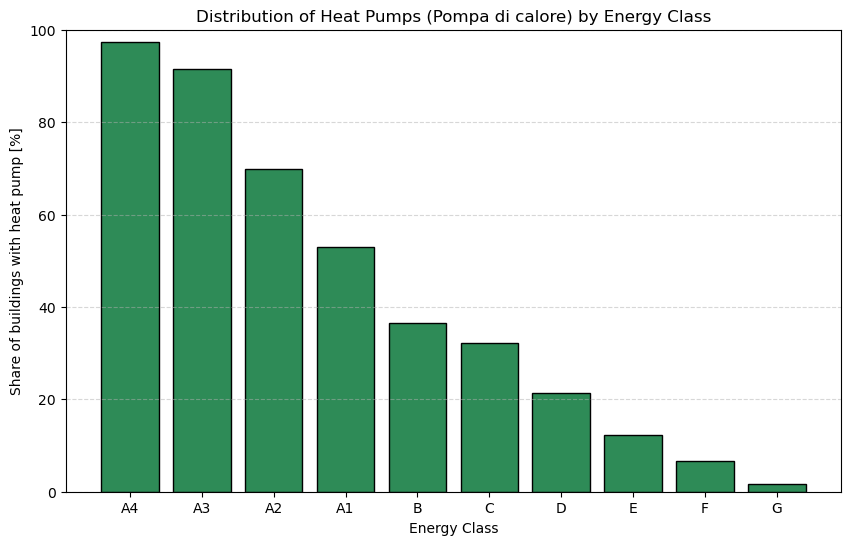

In [8]:
# Identify all columns that refer to heat pumps
impianto_cols = [col for col in df.columns if 'TIPO_IMPIANTO' in col]

# Create a boolean mask for each row: True if at least one column has 'pompa di calore'
has_pdc = df[impianto_cols].apply(lambda row: row.str.lower().str.contains('pompa di calore', na=False).any(), axis=1)

# Get energy class for all rows
classe = df['CLASSE_ENERGETICA']

# Total buildings per class
total_by_class = classe.value_counts()

# Buildings with at least one heat pump per class
pdc_by_class = classe[has_pdc].value_counts()

# Reorder based on standard energy class order
ordered_classes = ["A4", "A3", "A2", "A1", "B", "C", "D", "E", "F", "G"]
total_by_class = total_by_class.reindex(ordered_classes, fill_value=0)
pdc_by_class = pdc_by_class.reindex(ordered_classes, fill_value=0)

# Calculate share
pdc_percentage = (pdc_by_class / total_by_class * 100).fillna(0)

# Plot result
plt.figure(figsize=(10, 6))
plt.bar(pdc_percentage.index, pdc_percentage.values, color='seagreen', edgecolor='black')
plt.xlabel("Energy Class")
plt.ylabel("Share of buildings with heat pump [%]")
plt.title("Distribution of Heat Pumps (Pompa di calore) by Energy Class")
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

In [9]:
# Print the distribution
print("\nDistribution of heat pumps by energy class:")
for energy_class, percentage in pdc_percentage.items():
    print(f"{energy_class}: {percentage:.2f}%")


Distribution of heat pumps by energy class:
A4: 97.40%
A3: 91.48%
A2: 69.84%
A1: 53.05%
B: 36.63%
C: 32.23%
D: 21.32%
E: 12.19%
F: 6.66%
G: 1.77%


## Evaluation of Photovoltaic Systems

In [10]:
# Identify rows with photovoltaic (PV) installed
has_pv = df['CONSUMI_SOLARE_FOTOVOLTAICO'].astype(float) > 0
print(f"Percentage of buildings with PV: {len(df[has_pv]) / len(df) * 100:.2f}%")

Percentage of buildings with PV: 10.89%


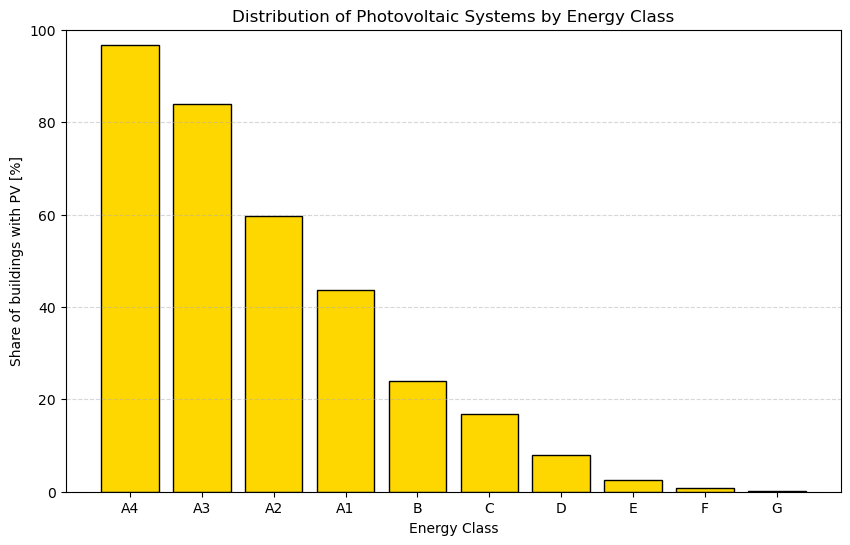

In [11]:
# Get energy class for all rows
classe = df['CLASSE_ENERGETICA']

# Total buildings per class
total_by_class = classe.value_counts()

# Buildings with PV per class
pv_by_class = classe[has_pv].value_counts()

# Reorder based on standard energy class order
ordered_classes = ["A4", "A3", "A2", "A1", "B", "C", "D", "E", "F", "G"]
total_by_class = total_by_class.reindex(ordered_classes, fill_value=0)
pv_by_class = pv_by_class.reindex(ordered_classes, fill_value=0)

# Calculate percentage
pv_percentage = (pv_by_class / total_by_class * 100).fillna(0)

# Plot result
plt.figure(figsize=(10, 6))
plt.bar(pv_percentage.index, pv_percentage.values, color='gold', edgecolor='black')
plt.xlabel("Energy Class")
plt.ylabel("Share of buildings with PV [%]")
plt.title("Distribution of Photovoltaic Systems by Energy Class")
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

In [12]:
# Print the distribution
print("\nDistribution of PV systems by energy class:")
for energy_class, percentage in pv_percentage.items():
    print(f"{energy_class}: {percentage:.2f}%")


Distribution of PV systems by energy class:
A4: 96.71%
A3: 84.03%
A2: 59.73%
A1: 43.61%
B: 23.98%
C: 16.72%
D: 7.88%
E: 2.63%
F: 0.76%
G: 0.15%


## Evaluation of Electricity Balance

In [13]:
# Convert columns to float
autoconsumo = df['CONSUMI_SOLARE_FOTOVOLTAICO'].astype(float)
importata = df['CONSUMI_ENERGIA_ELETTRICA'].astype(float)
esportata = df['ENERGIA_ESPORTATA'].astype(float)

# Avoid division by zero
total_energy = autoconsumo + importata
valid = total_energy > 0

# Compute metrics only for valid entries
importazioni = (importata / total_energy * 100).where(valid)
esportazioni = (esportata / total_energy * 100).where(valid)

# Add to DataFrame
df['IMP_%'] = importazioni
df['EXP_%'] = esportazioni

# Group by energy class
grouped = df.groupby('CLASSE_ENERGETICA')[['IMP_%', 'EXP_%']].mean()

# Reorder and fill missing
ordered_classes = ["A4", "A3", "A2", "A1", "B", "C", "D", "E", "F", "G"]
grouped = grouped.reindex(ordered_classes)

# Print the results
print("\nStats Impianti Fotovoltaici:")
for energy_class, row in grouped.iterrows():
    print(f"{energy_class}: Autosufficienza = {(100 - row['IMP_%']):.2f}%, Sovradimensionamento = {(row['EXP_%'] - 100):.2f}%")


Stats Impianti Fotovoltaici:
A4: Autosufficienza = 61.51%, Sovradimensionamento = 3.96%
A3: Autosufficienza = 44.08%, Sovradimensionamento = 34.20%
A2: Autosufficienza = 31.68%, Sovradimensionamento = 267.82%
A1: Autosufficienza = 25.57%, Sovradimensionamento = 1004.33%
B: Autosufficienza = 19.29%, Sovradimensionamento = 947.18%
C: Autosufficienza = 15.51%, Sovradimensionamento = 419.08%
D: Autosufficienza = 9.16%, Sovradimensionamento = 102.67%
E: Autosufficienza = 3.92%, Sovradimensionamento = 116.66%
F: Autosufficienza = 1.15%, Sovradimensionamento = -68.68%
G: Autosufficienza = 0.24%, Sovradimensionamento = -95.72%
